In [41]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [42]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [43]:
import gzip
import pickle

X,y = pickle.load(gzip.open('flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0
#X = X / 255. su DNN

In [77]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
#model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.2))
#model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))
#model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), input_shape=[50, 50, 1]))
model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.5))
#model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_51 (Batc (None, 9, 9, 64)        

In [84]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 100.00%


In [82]:
loss = model.fit(X, y, epochs=10, validation_split=0.2)  #treniruojam

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 293us/sample - loss: 0.0667 - acc: 0.9764 - val_loss: 0.0152 - val_acc: 0.9955
Epoch 2/10
8000/8000 [==============================] - 2s 286us/sample - loss: 0.0703 - acc: 0.9779 - val_loss: 0.0603 - val_acc: 0.9755
Epoch 3/10
8000/8000 [==============================] - 2s 290us/sample - loss: 0.0425 - acc: 0.9855 - val_loss: 1.0862 - val_acc: 0.7815
Epoch 4/10
8000/8000 [==============================] - 2s 289us/sample - loss: 0.0706 - acc: 0.9758 - val_loss: 0.0108 - val_acc: 0.9975
Epoch 5/10
8000/8000 [==============================] - 2s 285us/sample - loss: 0.0506 - acc: 0.9837 - val_loss: 0.0719 - val_acc: 0.9795
Epoch 6/10
8000/8000 [==============================] - 2s 286us/sample - loss: 0.0685 - acc: 0.9784 - val_loss: 0.0129 - val_acc: 0.9955
Epoch 7/10
8000/8000 [==============================] - 2s 284us/sample - loss: 0.0250 - acc: 0.9925 - val_loss: 0.0066 - va

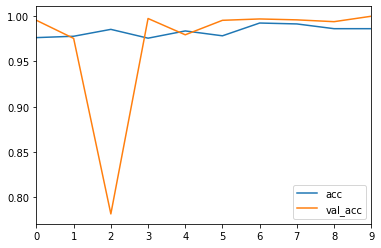

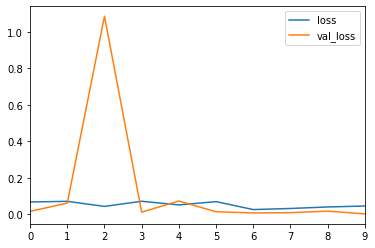

In [83]:
pd.DataFrame(loss.history)[['acc', 'val_acc']].plot() # nestabilumas loss kreiveje kaltinit arba learning rate arba pati data seta
                                                                # imant leanring_rate 0.02 matosi bangavima
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot() # loss isryskina paklaidas kurios yra treniruojamos


In [85]:
model.save('model4.h5')   #taip issaugom modeli, vietoj model gali but kitas pav